[View in Colaboratory](https://colab.research.google.com/github/AlbertZheng/deep-learning-lab/blob/master/tensorlayer/notebooks/tutorial_cifar10_tfrecord.ipynb)

## 安装依赖packages

In [1]:
!pip install "tensorlayer>=1.10"


    100% |████████████████████████████████| 317kB 22.6MB/s 
    100% |████████████████████████████████| 3.3MB 945kB/s 
    100% |████████████████████████████████| 5.8MB 6.7MB/s 
    100% |████████████████████████████████| 51kB 21.2MB/s 
    100% |████████████████████████████████| 25.3MB 638kB/s 
    100% |████████████████████████████████| 92kB 23.2MB/s 
    100% |████████████████████████████████| 31.2MB 1.4MB/s 
    100% |████████████████████████████████| 12.6MB 3.6MB/s 
    100% |████████████████████████████████| 665kB 22.3MB/s 
    100% |████████████████████████████████| 952kB 17.8MB/s 
  Running setup.py bdist_wheel for imageio ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/e0/43/31/605de9372ceaf657f152d3d5e82f42cf265d81db8bbe63cde1
Successfully built imageio
scikit-image 0.14.0 has requirement pillow>=4.3.0, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: tqdm 4.26.0
    Uninstalling tqdm-4.26.0:
      Successfully uninsta

## 检测GPU

In [4]:
import os
import time
import numpy as np
import tensorflow as tf
import tensorlayer as tl
from tensorlayer.layers import *

tf.logging.set_verbosity(tf.logging.DEBUG)
tl.logging.set_verbosity(tl.logging.DEBUG)


device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('*** GPU device not found ***')
print('### Found GPU at: {} ###'.format(device_name))

# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True


### Found GPU at: /device:GPU:0 ###


## Download cifar10 data, and convert to TFRecord format

[TL] Load or Download cifar10 > data/cifar10
X_train.shape (50000, 32, 32, 3)
y_train.shape (50000,)
X_test.shape (10000, 32, 32, 3)
y_test.shape (10000,)
X float32   y int32
train.cifar10 exists
Converting data into test.cifar10 ...
Current dir: /content 


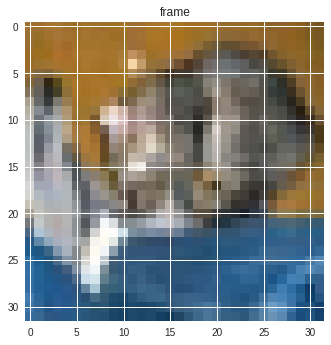

Image: index 0 , label 3 


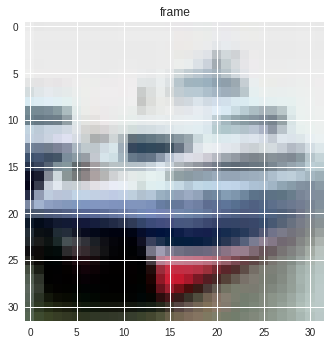

Image: index 1 , label 8 


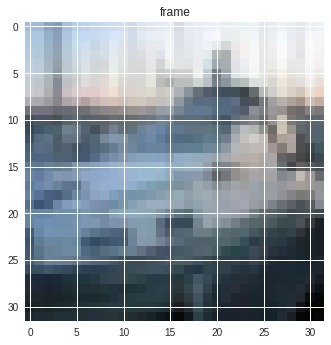

Image: index 2 , label 8 


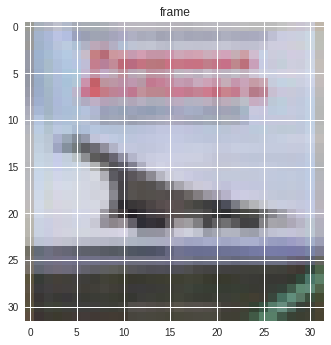

Image: index 3 , label 0 


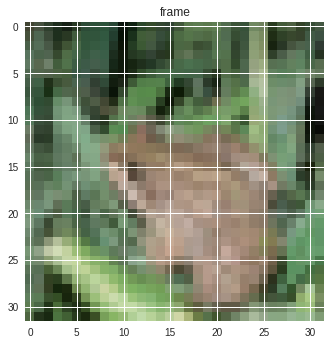

Image: index 4 , label 6 


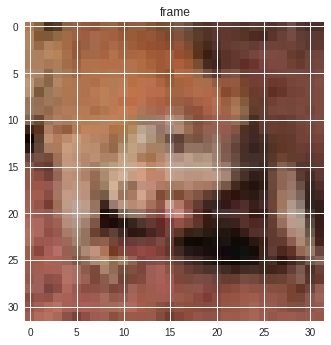

Image: index 5 , label 6 


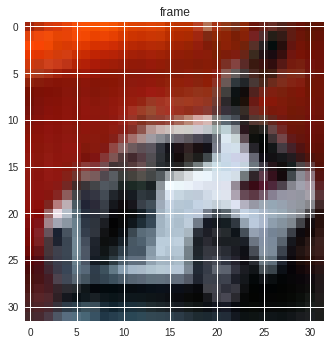

Image: index 6 , label 1 


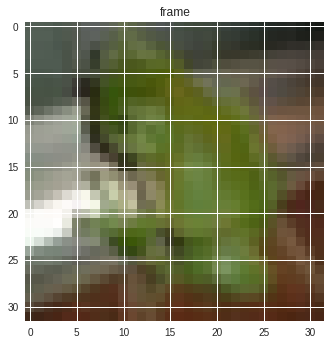

Image: index 7 , label 6 


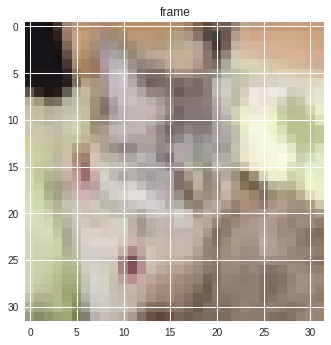

Image: index 8 , label 3 


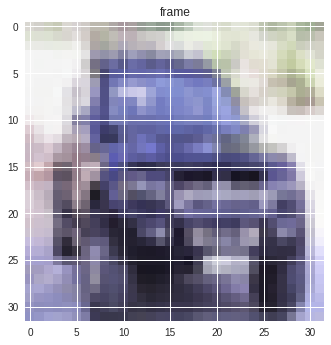

Image: index 9 , label 1 


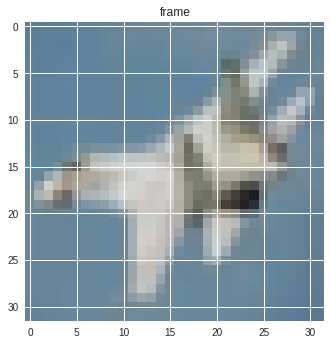

Image: index 10 , label 0 


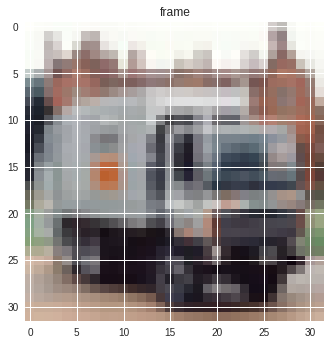

Image: index 11 , label 9 


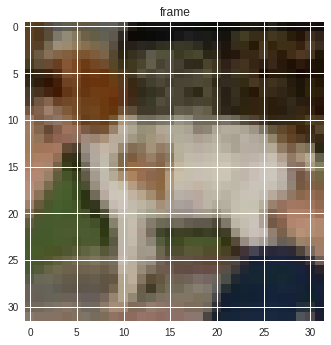

Image: index 12 , label 5 


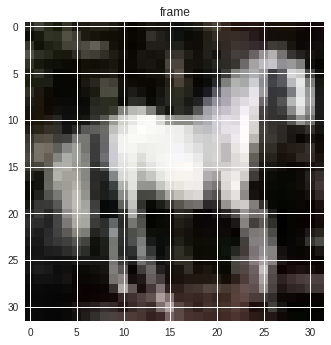

Image: index 13 , label 7 


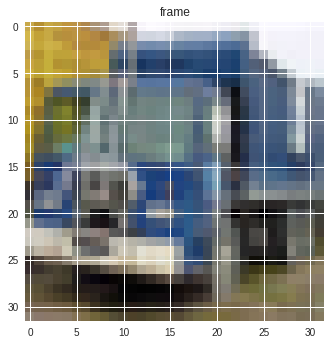

Image: index 14 , label 9 


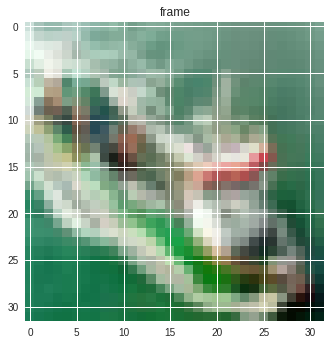

Image: index 15 , label 8 


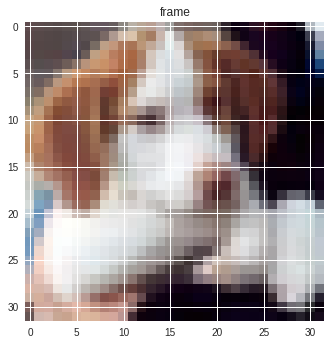

Image: index 16 , label 5 


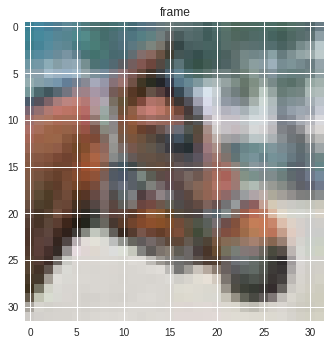

Image: index 17 , label 7 


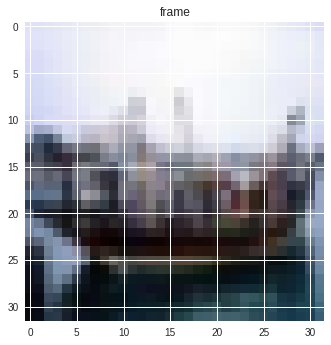

Image: index 18 , label 8 


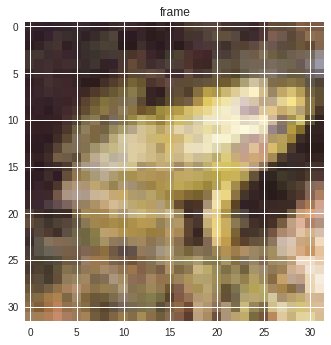

Image: index 19 , label 6 


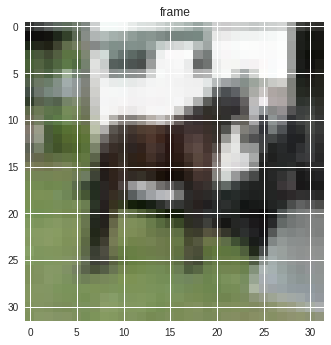

Image: index 20 , label 7 


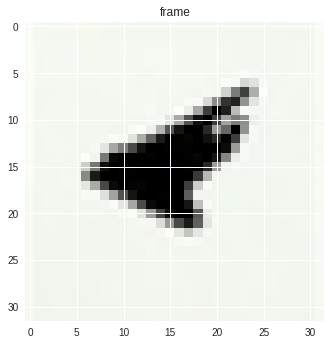

Image: index 21 , label 0 


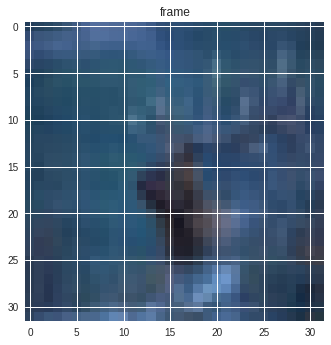

Image: index 22 , label 4 


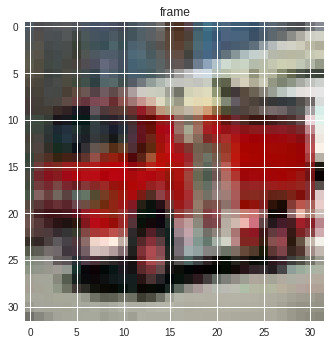

Image: index 23 , label 9 


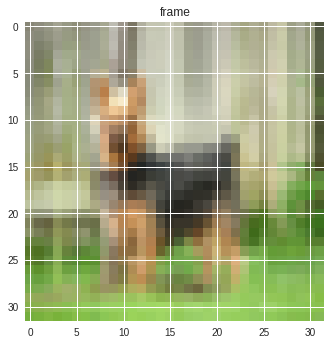

Image: index 24 , label 5 


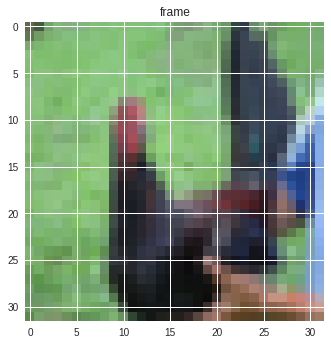

Image: index 25 , label 2 


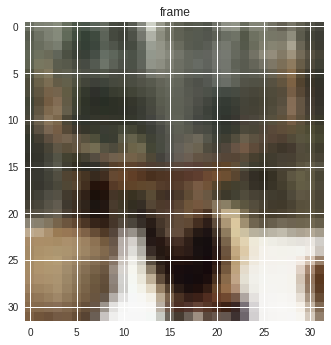

Image: index 26 , label 4 


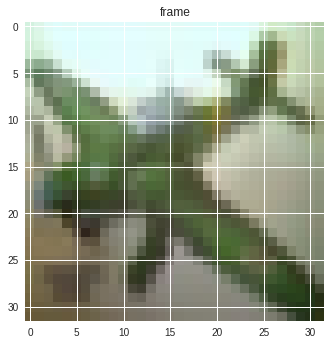

KeyboardInterrupt: ignored

In [5]:
# Download data, and convert to TFRecord format
X_train, y_train, X_test, y_test = tl.files.load_cifar10_dataset(shape=(-1, 32, 32, 3), plotable=False)

print('X_train.shape', X_train.shape)  # (50000, 32, 32, 3)
print('y_train.shape', y_train.shape)  # (50000,)
print('X_test.shape', X_test.shape)  # (10000, 32, 32, 3)
print('y_test.shape', y_test.shape)  # (10000,)
print('X %s   y %s' % (X_test.dtype, y_test.dtype))  # X float32   y int32

def data_to_tfrecord(images, labels, filename):
    """Save data into TFRecord."""
    if os.path.isfile(filename):
        print("%s exists" % filename)
        return
    
    print("Converting data into %s ..." % filename)
    print("Current dir: %s " % os.getcwd())
    
    writer = tf.python_io.TFRecordWriter(filename)
    for index, img in enumerate(images):
        # Visualize a image
        tl.visualize.frame(np.asarray(img, dtype=np.uint8), second=1, saveable=False, name='frame', fig_idx=1236)

        label = int(labels[index])
        print("Image: index %d , label %d " % (index, label))

        img_raw = img.tobytes()
        
        # Convert the bytes back to image as follow:
        # image = Image.frombytes('RGB', (32, 32), img_raw)
        # image = np.fromstring(img_raw, np.float32)
        # image = image.reshape([32, 32, 3])
        # tl.visualize.frame(np.asarray(image, dtype=np.uint8), second=1, saveable=False, name='frame', fig_idx=1236)
        
        example = tf.train.Example(
            features=tf.train.Features(
                feature={
                    "label": tf.train.Feature(int64_list=tf.train.Int64List(value=[label])),
                    'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img_raw])),
                }
            )
        )
        writer.write(example.SerializeToString())  # Serialize To String
    writer.close()

    
# Save data into TFRecord files
data_to_tfrecord(images=X_train, labels=y_train, filename="train.cifar10")
data_to_tfrecord(images=X_test, labels=y_test, filename="test.cifar10")
